In [5]:
#! pip install requests

In [6]:
#! pip install beautifulsoup4

In [39]:
#! pip install Jinja2

  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.0.1-cp38-cp38-macosx_10_9_x86_64.whl (13 kB)


In [19]:
#%%writefile dson_COVID_scraper.py

# script:
# read in data
# check site
# compare data
# if different:
    # send message
    # append data
    
import pandas as pd
import datetime
import requests
from bs4 import BeautifulSoup

def parse_soup(soup):
    td = soup.find_all('td')
    result = [x.get_text() for x in td]
    to_send = "Students pos/cum. pos/quarantine:" + result[2]+ '/' + result[3]+ '/' + result[4]
    to_append = [int(result[2]), int(result[3]), int(result[4])]
    return to_append, to_send

def telegram_bot_sendtext(bot_message):
    
    bot_token = '2113495995:AAE0-1MxKj6MNECSrobxt6tIcOj9wYz10OA'
    bot_chatID = '2122924009'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response.json()

try:
    data = pd.read_csv('./data.csv', index_col=0)
except FileNotFoundError:
    print("CSV does not exist. Creating new one.")
    time = datetime.datetime.now().strftime("%x %X")
    df = pd.DataFrame({'time':[time], 'pos':[0], 'cumulative':[0], 'quarantine':[0]})
    df.to_csv('./data.csv')
    data = pd.read_csv('./data.csv', index_col=0)
    
print("found data, reading site")

url = "https://www.dickinson.edu/homepage/1505/fall_2021_semester_information"
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')

current_numbers, to_send = parse_soup(soup)
print("Found Current numbers:", to_send)

last_numbers = list(data.iloc[-1].values[1:])

if last_numbers != current_numbers:
    print("New numbers!")
    time = datetime.datetime.now().strftime("%x %X")
    new_numbers = pd.DataFrame({'time':[time],'pos':[current_numbers[0]], 'cumulative':[current_numbers[1]], 'quarantine':[current_numbers[2]]})
    data = data.append(new_numbers, ignore_index=True)
    print("Appended. Writing csv.")
    data.to_csv('./data.csv')
    
    # send telegram
    telegram_bot_sendtext(to_send)
    
else:
    print("No new numbers right now.")

found data, reading site
Found Current numbers: Students pos/cum. pos/quarantine:6/50/0
New numbers!
Appended. Writing csv.


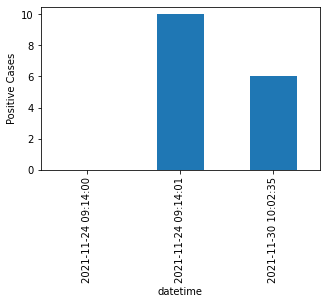

In [58]:
from matplotlib import pyplot as plt

pos_barplot = data[:10].plot(x='datetime', y='pos', kind='bar', figsize=(5,3), ylabel="Positive Cases", legend=False)
plt.savefig("./dson-covid-counts/plot.png", bbox_inches="tight")

In [49]:
data_html = data.to_html()
print(data_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>time</th>
      <th>pos</th>
      <th>cumulative</th>
      <th>quarantine</th>
      <th>datetime</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>11/24/21 09:14:00</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>2021-11-24 09:14:00</td>
    </tr>
    <tr>
      <th>1</th>
      <td>11/24/21 09:14:01</td>
      <td>10</td>
      <td>47</td>
      <td>2</td>
      <td>2021-11-24 09:14:01</td>
    </tr>
    <tr>
      <th>2</th>
      <td>11/30/21 10:02:35</td>
      <td>6</td>
      <td>50</td>
      <td>0</td>
      <td>2021-11-30 10:02:35</td>
    </tr>
  </tbody>
</table>


In [45]:
from jinja2 import Environment, select_autoescape, FileSystemLoader
env = Environment(loader=FileSystemLoader('./dson-covid-counts/templates'))
#env = Environment(
#    loader=PackageLoader("yourapp"),
#    autoescape=select_autoescape()
#)

template = env.get_template("index.html")

In [61]:
#print(template.render(plot_path="plot.png", rendered_table=data_html))
site = template.render(plot_path="plot.png", rendered_table=data_html)

In [60]:
import os

os.system("send the website to git")

sh: send: command not found


32512